# Loan Dataset :

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv(r'/content/drive/MyDrive/consumer_complaints.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [6]:
data.shape

(555957, 18)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [8]:
data['issue'].value_counts()

Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
                                            ...  
Lost or stolen money order                     25
Incorrect exchange rate                        16
Lender sold the property                        5
Lender damaged or destroyed vehicle             5
Lender damaged or destroyed property            1
Name: issue, Length: 95, dtype: int64

In [9]:
data["product"].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

# Feature Engineering :

In [10]:

con_df = pd.DataFrame()

In [11]:
con_df = data["sub_issue"].astype(str) + ',' + data["issue"]

In [12]:
con_df.head()

0         nan,Loan modification,collection,foreclosure
1         nan,Loan servicing, payments, escrow account
2    Account status,Incorrect information on credit...
3                Repaying your loan,Repaying your loan
4    Attempted to collect wrong amount,False statem...
dtype: object

In [13]:
len(con_df)

555957

In [14]:
import seaborn as sns

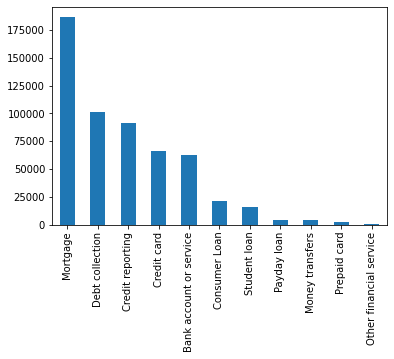

In [15]:
import matplotlib.pyplot as plt
data["product"].value_counts().plot(kind='bar')

## Text Cleaning  &  EDA  :

In [16]:
import re

In [17]:
# Crate a function to Clean Text :
def cleantxt(text):
  text = re.sub('nan,','',text)
  text = re.sub('/', '', text)
  text = re.sub('@[A-Za-z0-9]+', '', text)  # removing word that contains @
  text = re.sub('#', '', text)              # removing word that contains #
  text = re.sub('https?:\/\/\S+', '', text) # removing hyperlinks 
  text = re.sub('RT[\s]+', '', text)        # removing RT in case of Cleanning Re-Tweets from Text 
  text = re.sub('\n', '', text)             # removing \n
  text = re.sub(':', '', text)              # removing :
  text = re.sub(',', ' ', text)
  return text

In [18]:
clean_con_df = con_df.apply(cleantxt)

In [19]:
clean_con_df.head()

0             Loan modification collection foreclosure
1             Loan servicing  payments  escrow account
2    Account status Incorrect information on credit...
3                Repaying your loan Repaying your loan
4    Attempted to collect wrong amount False statem...
dtype: object

In [20]:
clean_con_df[0]

'Loan modification collection foreclosure'

In [21]:

split_issue = clean_con_df.apply(lambda x: x.split(','))

In [22]:
split_issue.head(15)

0            [Loan modification collection foreclosure]
1            [Loan servicing  payments  escrow account]
2     [Account status Incorrect information on credi...
3               [Repaying your loan Repaying your loan]
4     [Attempted to collect wrong amount False state...
5                        [Application processing delay]
6                        [Credit line increasedecrease]
7                            [Deposits and withdrawals]
8                            [Deposits and withdrawals]
9            [Loan modification collection foreclosure]
10    [Debt was paid Cont'd attempts collect debt no...
11           [Loan servicing  payments  escrow account]
12                      [Credit decision  Underwriting]
13           [Application  originator  mortgage broker]
14    [Called outside of 8am-9pm Communication tactics]
dtype: object

In [23]:
len(split_issue)

555957

In [24]:
# product = []
# issue = []
# for i in range(len(split_issue)-1):
#   for j in split_issue[i]:
#     product.append(data['product'][i])
#     issue.append(j)

In [25]:
# import numpy as np
# np.array(product).shape

In [26]:
# np.array(issue).shape

In [27]:
final_data = pd.DataFrame()

In [28]:
final_data["product"] = data["product"]

In [29]:
final_data["issue"] = pd.Series(clean_con_df)

In [30]:
final_data.head()

,product,issue
0,Mortgage,Loan modification collection foreclosure
1,Mortgage,Loan servicing payments escrow account
2,Credit reporting,Account status Incorrect information on credit...
3,Student loan,Repaying your loan Repaying your loan
4,Debt collection,Attempted to collect wrong amount False statem...


In [31]:
final_data.shape

(555957, 2)

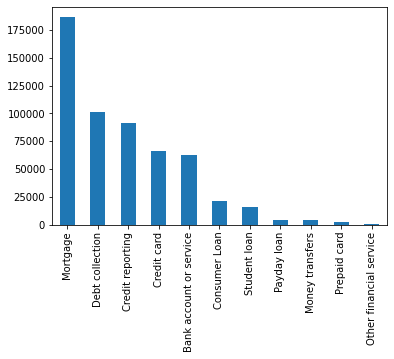

In [32]:
final_data['product'].value_counts().plot(kind='bar')

In [33]:
y = final_data['product']

In [34]:
y = pd.get_dummies(y)

In [35]:
y.head()

,Bank account or service,Consumer Loan,Credit card,Credit reporting,Debt collection,Money transfers,Mortgage,Other financial service,Payday loan,Prepaid card,Student loan
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,0


In [36]:
y.shape

(555957, 11)

In [37]:
from collections import Counter

In [38]:
docs = final_data['issue'].values
counts = Counter()
for i,complaint in enumerate(docs):
  counts.update(complaint.split())

In [39]:
counts

Counter({'8am-9pm': 699,
         'APR': 4620,
         'ATM': 4320,
         'Account': 61711,
         'Adding': 154,
         'Advertising': 2257,
         'Application': 13697,
         'Applied': 546,
         'Arbitration': 253,
         'Attempted': 6981,
         'Balance': 992,
         'Bankruptcy': 379,
         'Billing': 13695,
         'CRC': 3199,
         'Called': 2113,
         "Can't": 10134,
         'Cash': 352,
         'Charged': 4023,
         'ClosingCancelling': 4786,
         'Collection': 1907,
         'Communication': 18293,
         "Cont'd": 42285,
         'Contacted': 3871,
         'Convenience': 113,
         'Credit': 25792,
         'Customer': 5149,
         'Dealing': 5904,
         'Debt': 44335,
         'Delinquent': 2347,
         'Deposits': 17195,
         'Disclosure': 18292,
         'Disclosures': 29,
         "Don't": 768,
         'Embezzlement': 5899,
         'Excessive': 59,
         'False': 8274,
         'Fees': 140,
         'Fo

In [40]:
docs

array(['Loan modification collection foreclosure',
       'Loan servicing  payments  escrow account',
       'Account status Incorrect information on credit report', ...,
       'Loan modification collection foreclosure',
       'Frequent or repeated calls Communication tactics',
       "Debt is not mine Cont'd attempts collect debt not owed"],
      dtype=object)

In [41]:
docs.shape

(555957,)

In [42]:
words = sorted(counts, key=counts.get, reverse=True)
vocab_size = len(words)

In [43]:
vocab_size

339

In [44]:
words[0:5]

['Loan', 'not', 'or', 'modification', 'collection']

In [45]:
word_to_int = {word: i for i, word in enumerate(words,1)}

In [46]:
int_to_word = {i: word for i, word in enumerate(words,1)}

In [47]:
int_to_word[6]

'foreclosure'

In [48]:
word_to_int['foreclosure']

6

In [49]:
encodded_docs = []
for doc in docs:
  encodded_docs.append([word_to_int[word] for word in doc.split()])

In [50]:
encodded_docs[:10]

[[1, 4, 5, 6],
 [1, 16, 11, 17, 12],
 [15, 32, 14, 10, 13, 7, 9],
 [99, 100, 28, 99, 100, 28],
 [106, 18, 19, 109, 112, 91, 92, 3, 93],
 [51, 284, 285],
 [34, 174, 201],
 [42, 31, 43],
 [42, 31, 43],
 [1, 4, 5, 6]]

In [51]:
docs[:10]

array(['Loan modification collection foreclosure',
       'Loan servicing  payments  escrow account',
       'Account status Incorrect information on credit report',
       'Repaying your loan Repaying your loan',
       'Attempted to collect wrong amount False statements or representation',
       'Application processing delay', 'Credit line increasedecrease',
       'Deposits and withdrawals', 'Deposits and withdrawals',
       'Loan modification collection foreclosure'], dtype=object)

In [52]:
final_data['issue'].iloc[:10]

0             Loan modification collection foreclosure
1             Loan servicing  payments  escrow account
2    Account status Incorrect information on credit...
3                Repaying your loan Repaying your loan
4    Attempted to collect wrong amount False statem...
5                         Application processing delay
6                         Credit line increasedecrease
7                             Deposits and withdrawals
8                             Deposits and withdrawals
9             Loan modification collection foreclosure
Name: issue, dtype: object

In [53]:
docs.shape

(555957,)

In [54]:
import numpy as np
np.array(encodded_docs).shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


(555957,)

In [55]:
from keras.preprocessing.sequence import pad_sequences

In [56]:
l= []    # max words = 
for i in encodded_docs:
  l.append(len(i))

In [57]:
max(l)

14

In [58]:
max_len= 10
padded_docs = pad_sequences(encodded_docs, maxlen=max_len, padding='post')

In [59]:
padded_docs[:10]

array([[  1,   4,   5,   6,   0,   0,   0,   0,   0,   0],
       [  1,  16,  11,  17,  12,   0,   0,   0,   0,   0],
       [ 15,  32,  14,  10,  13,   7,   9,   0,   0,   0],
       [ 99, 100,  28,  99, 100,  28,   0,   0,   0,   0],
       [106,  18,  19, 109, 112,  91,  92,   3,  93,   0],
       [ 51, 284, 285,   0,   0,   0,   0,   0,   0,   0],
       [ 34, 174, 201,   0,   0,   0,   0,   0,   0,   0],
       [ 42,  31,  43,   0,   0,   0,   0,   0,   0,   0],
       [ 42,  31,  43,   0,   0,   0,   0,   0,   0,   0],
       [  1,   4,   5,   6,   0,   0,   0,   0,   0,   0]], dtype=int32)

# Word2Vec Manual Conversion :

In [60]:
from gensim.models import Word2Vec

In [61]:
check = final_data['issue'].apply(lambda x: x.split())
check[:10]

0        [Loan, modification, collection, foreclosure]
1         [Loan, servicing, payments, escrow, account]
2    [Account, status, Incorrect, information, on, ...
3         [Repaying, your, loan, Repaying, your, loan]
4    [Attempted, to, collect, wrong, amount, False,...
5                     [Application, processing, delay]
6                     [Credit, line, increasedecrease]
7                         [Deposits, and, withdrawals]
8                         [Deposits, and, withdrawals]
9        [Loan, modification, collection, foreclosure]
Name: issue, dtype: object

In [62]:
w2v_model = Word2Vec(check, min_count=1, size=50, window=2, max_vocab_size=339)

In [63]:
model_words = list(w2v_model.wv.vocab)

In [64]:
model_words[:10]

['Loan',
 'modification',
 'collection',
 'foreclosure',
 'servicing',
 'payments',
 'escrow',
 'account',
 'Account',
 'status']

In [65]:
print(w2v_model)

Word2Vec(vocab=339, size=50, alpha=0.025)


In [66]:
w2v_model['Loan'].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


(50,)

In [67]:
w2v_model['Loan']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.17693967, -0.94275534, -0.39078087,  0.04868909,  0.81296194,
       -1.6555692 ,  0.3880071 , -1.869072  ,  0.6180274 ,  1.2669271 ,
        0.7708124 ,  2.1664357 , -0.48371434,  0.882988  ,  1.6888129 ,
        0.58078223,  1.721428  ,  1.3059752 , -0.39963466, -1.2020084 ,
       -1.1970756 , -1.8771627 ,  2.435508  , -1.8729529 , -2.964399  ,
        0.7733153 ,  1.1501006 , -1.1073611 , -1.8468466 , -0.9867129 ,
        0.8606512 , -1.730014  ,  1.4333901 , -0.6137386 ,  1.4806775 ,
        1.0414782 ,  0.04737346,  2.725627  ,  0.18510742,  0.29844704,
        0.8914861 , -2.0781937 ,  0.84435904,  1.3469988 , -0.8376562 ,
       -1.8952461 ,  0.72946906,  0.95208967, -0.4700995 , -0.11413469],
      dtype=float32)

In [68]:
w2v_model.save('w2v_model.bin')

In [69]:
new_model = Word2Vec.load('w2v_model.bin')

In [70]:
print(new_model)

Word2Vec(vocab=339, size=50, alpha=0.025)


In [71]:
padded_docs.shape

(555957, 10)

In [72]:
padded_docs_arr = np.array(padded_docs).reshape(len(padded_docs), padded_docs.shape[1])

In [73]:
padded_docs_arr.shape

(555957, 10)

In [74]:
# import gensim
# gensim.__version__

In [75]:
import tensorflow as tf

# Neural Network :

In [76]:
from keras.layers.recurrent import SimpleRNN
from keras.layers.embeddings import Embedding
from keras.layers import LSTM, Dense, Flatten
from keras.models import Sequential

In [77]:
vocab_size

339

In [78]:
y.shape

(555957, 11)

## Simple RNN :

In [87]:
# # define the model
# embed_length=50
# # model = Sequential()
# # model.add(Embedding(vocab_size - 1, embed_length, input_length=max_len))
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Embedding(len(padded_docs), embed_length, input_length=10))
# model.add(SimpleRNN(1,activation='sigmoid', return_sequences=False,recurrent_initializer='Zeros',input_shape=(max_len,embed_length),unroll=True))
# #model.add(Flatten())
# model.add(Dense(11, activation='softmax'))
# #model.add(Dense(1, activation='sigmoid'))
# # compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# # summarize the model
# print(model.summary())

# Bi-Directional LSTM :

In [80]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import LSTM,Embedding,Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D,Bidirectional


In [82]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(len(padded_docs),output_dim=50, input_length=10))
model.add(Bidirectional(LSTM(100, return_sequences = True, recurrent_dropout = 0.1)))
# model.add(Dense(11, activation='softmax'))
model.add(Flatten())
# model.add(Dense(128, activation='sigmoid'))
model.add(Dense(11, activation='softmax'))
# model.add(tf.keras.layers(Bidirectional(LSTM(32, ))))

In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 50)            27797850  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 200)           120800    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 2000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                22011     
Total params: 27,940,661
Trainable params: 27,940,661
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [86]:
history = model.fit(padded_docs[:420000], np.array(y[:420000]), epochs=2, validation_split=0.2, verbose=1, batch_size=256)

Epoch 1/2
1313/1313 [==============================] - 513s 387ms/step - loss: 0.0698 - accuracy: 0.9779 - val_loss: 0.0161 - val_accuracy: 0.9907
Epoch 2/2
1313/1313 [==============================] - 508s 387ms/step - loss: 0.0161 - accuracy: 0.9922 - val_loss: 0.0156 - val_accuracy: 0.9907


In [ ]:
# history.history['']

# Loss & Accuracy Graph :

Text(0, 0.5, 'Accuracy')

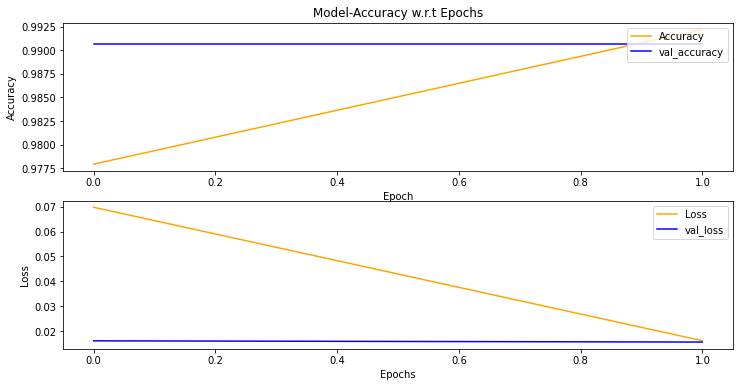

In [87]:
# visulize loss w.r.t epochs :
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))
ax2.plot(history.history['loss'], color='orange', label='Loss')
ax2.plot(history.history['val_loss'], color='blue', label='val_loss')
ax2.legend(loc='upper right')
ax1.plot(history.history['accuracy'], label='Accuracy', color='orange')
ax1.plot(history.history['val_accuracy'], label='val_accuracy', color='blue')
ax1.legend(loc="upper right")
ax1.set_title("Model-Accuracy w.r.t Epochs", loc='center')
plt.xlabel("Epochs")
plt.ylabel("Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")


# Prediction :


In [88]:
y_pred = model.predict(padded_docs[420000:])

In [89]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [90]:
y_pred_classes

array([2, 0, 2, ..., 6, 4, 4])

In [91]:
y_test = np.array(y[420000:])

In [92]:
y_test

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [93]:
y_true = np.argmax(y_test, axis=1)

In [94]:
y_true

array([2, 0, 2, ..., 6, 4, 4])

## Accuracy :

In [95]:
np.mean(y_true == y_pred_classes)

0.9868561383378568

# Confusion Matrix :

In [96]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

Text(0.5, 13.421126458070283, 'Predicted Label')

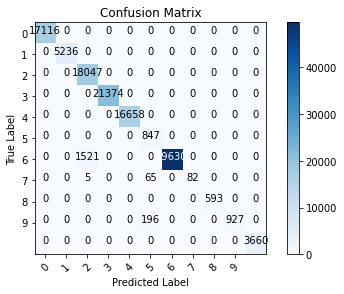

In [97]:
import itertools
plt.imshow(cm, cmap = plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(range(10)))
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max()/2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i , cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

In [98]:
model.layers

In [99]:
emb_model = Model(inputs=model.input, outputs=model.layers[0].output)

# Test data Distriution :

In [100]:
vectors = emb_model.predict(padded_docs[420000:])

In [101]:
vectors.shape

(135957, 10, 50)

In [102]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [103]:
tfidf_vec = TfidfVectorizer()

In [104]:
tfidf_vec.fit(docs)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [105]:
issue_vector = tfidf_vec.transform(docs)
print (issue_vector.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [106]:
issue_vector.shape

(555957, 311)

### Singular Value Decomposition :

In [107]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30)

In [108]:
svd_data = svd.fit_transform(issue_vector)

In [109]:
svd.explained_variance_ratio_.sum()

0.82806276365994

In [110]:
svd_data.shape

(555957, 30)

### Principle component analysis :

In [111]:
from sklearn.decomposition import PCA

In [112]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(svd_data)

In [113]:
pca.explained_variance_ratio_.sum()

0.3314134732206848

In [122]:
pca_df = pd.DataFrame(pca_data)

In [123]:
pca_df.columns = ['pc1', 'pc2']

In [124]:
pca_df.shape

(555957, 2)

# Data Visualization :

In [125]:
import seaborn as sns

In [126]:
pca_df['y_pred_classes'] = pd.Series(y_pred_classes)
pca_df['y_true'] = pd.Series(y_true)

In [131]:
label = y.columns

In [132]:
label

Index(['Bank account or service', 'Consumer Loan', 'Credit card',
       'Credit reporting', 'Debt collection', 'Money transfers', 'Mortgage',
       'Other financial service', 'Payday loan', 'Prepaid card',
       'Student loan'],
      dtype='object')

In [133]:
l = np.arange(11)
l

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [134]:
dictionary = dict(zip(l,label))

In [135]:
dictionary

{0: 'Bank account or service',
 1: 'Consumer Loan',
 2: 'Credit card',
 3: 'Credit reporting',
 4: 'Debt collection',
 5: 'Money transfers',
 6: 'Mortgage',
 7: 'Other financial service',
 8: 'Payday loan',
 9: 'Prepaid card',
 10: 'Student loan'}

In [140]:
label_list = []
for i in y_true:
  label_list.append(dictionary[i])

In [141]:
pca_df['label'] = pd.Series(label_list)

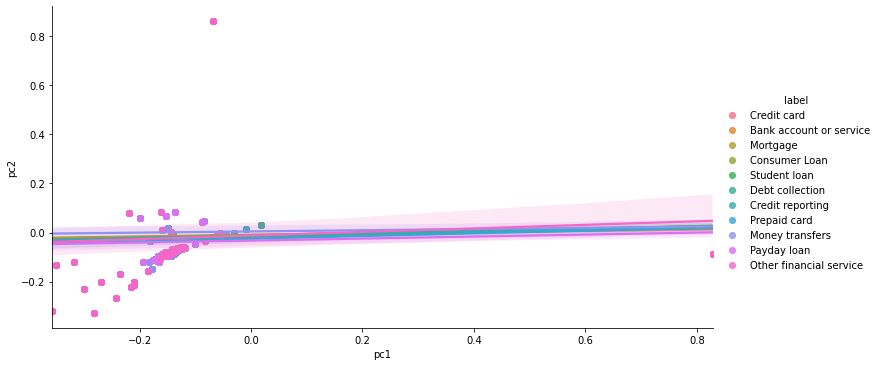

In [144]:
sns.lmplot(x='pc1', y='pc2', data=pca_df, hue='label', aspect=2)

# Mode of Submission of Complaint :

In [163]:
pca_df['submitted_via'] = data['submitted_via']

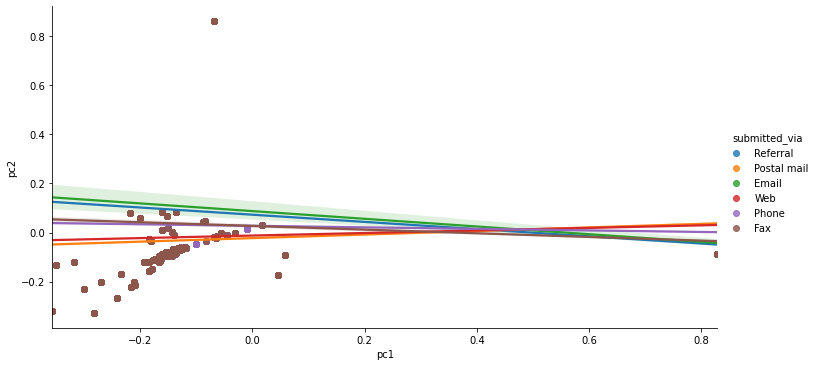

In [165]:
sns.lmplot(x='pc1', y='pc2', data=pca_df, hue='submitted_via', aspect=2)